## Import Libraries and dataset for EDA on bikepghpublic2017

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [276]:
# File path of the Excel file
file_path = r"/Users/mattmcmon/Library/CloudStorage/GoogleDrive-mmcmon1990@gmail.com/My Drive/CMU/Software Design for Data Scientists/bikepghpublic2017.csv" #mac
#file_path = r"C:\Users\Matt\Google Drive\CMU\Software Design for Data Scientists\bikepghpublic2017.csv" #windows

In [277]:
# Load the Excel file into a DataFrame
bikepghpublic2017 = pd.read_csv(file_path)

## Display sample of dataset

In [278]:
# Display the first few rows of the DataFrame
bikepghpublic2017.head()

,Response ID,Start Date,End Date,Status,Source Type,InteractPedestrian,InteractBicycle,CircumstancesCoded,FeelingsProvingGround,SafetyHuman,...,AVSafetyPotential,RegulationTesting,RegulationSpeed,RegulationSchoolZone,RegulationShareData,AdvocacyIssues,BikePghPosition,PayingAttentionAV,FamiliarityTechnoology,ZipCode
0,260279884,02/22/2017 10:38:27 AM PST,02/22/2017 10:46:22 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Approve,2,...,Yes,Yes,Not sure,Not sure,Yes,Disagree,Neither Support nor Oppose,To some extent,Mostly Unfamiliar,15203.0
1,260293425,02/22/2017 5:59:59 PM PST,02/22/2017 6:04:04 PM PST,COMPLETE,Survey Link,Yes,Yes,9.0,Disapprove,2,...,No,No,No,No,No,Neutral,Actively Oppose,To a moderate extent,Somewhat familiar,15201.0
2,260293589,02/22/2017 6:06:17 PM PST,02/22/2017 6:15:05 PM PST,COMPLETE,Survey Link,No,Yes,9.0,Disapprove,2,...,Not sure,Yes,Not sure,Yes,Not sure,Neutral,Neither Support nor Oppose,To little extent,Somewhat familiar,15222.0
3,260299834,02/22/2017 10:56:42 PM PST,02/22/2017 11:03:27 PM PST,COMPLETE,Survey Link,No,No,9.0,Neutral,2,...,Yes,Yes,Yes,No,Yes,Disagree,Neither Support nor Oppose,To a moderate extent,Somewhat familiar,15106.0
4,260335956,02/23/2017 11:20:08 AM PST,02/23/2017 11:22:05 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Somewhat Approve,4,...,Maybe,Yes,Yes,No,Not sure,Disagree,Actively Support,To little extent,Mostly Unfamiliar,15202.0


## Summary Statistics

In [279]:
# Information about DataFrame
bikepghpublic2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response ID             813 non-null    int64  
 1   Start Date              813 non-null    object 
 2   End Date                813 non-null    object 
 3   Status                  813 non-null    object 
 4   Source Type             813 non-null    object 
 5   InteractPedestrian      799 non-null    object 
 6   InteractBicycle         799 non-null    object 
 7   CircumstancesCoded      403 non-null    float64
 8   FeelingsProvingGround   799 non-null    object 
 9   SafetyHuman             799 non-null    object 
 10  SafetyAV                799 non-null    object 
 11  AVSafetyPotential       799 non-null    object 
 12  RegulationTesting       799 non-null    object 
 13  RegulationSpeed         799 non-null    object 
 14  RegulationSchoolZone    799 non-null    ob

In [280]:
# Summary statistics of the DataFrame
bikepghpublic2017.describe()

,Response ID,CircumstancesCoded,ZipCode
count,8.130000e+02,403.000000,799.000000
mean,2.605575e+08,2.682382,15440.057572
std,2.715053e+05,1.792289,4127.398184
min,2.602790e+08,1.000000,0.000000
25%,2.603363e+08,2.000000,15206.000000
50%,2.603790e+08,2.000000,15215.000000
75%,2.608905e+08,3.000000,15224.000000
max,2.611574e+08,9.000000,97206.000000


In [281]:
#Display SafetyHuman responses
bikepghpublic2017.groupby('SafetyHuman')['SafetyHuman'].size()

SafetyHuman
1                 43
2                215
3                308
4                193
5                 34
No experience      6
Name: SafetyHuman, dtype: int64

In [282]:
#Drop 'No experience' Data
bikepghpublic2017 = bikepghpublic2017[bikepghpublic2017['SafetyHuman'] != "No experience"]


In [283]:
# Display updated SafetyHuman responses
bikepghpublic2017.groupby('SafetyHuman')['SafetyHuman'].size()

SafetyHuman
1     43
2    215
3    308
4    193
5     34
Name: SafetyHuman, dtype: int64

In [284]:
#Display SafetyAV responses
bikepghpublic2017.groupby('SafetyAV')['SafetyAV'].size()

SafetyAV
1                 50
2                 80
3                177
4                255
5                153
No experience     78
Name: SafetyAV, dtype: int64

In [285]:
#Drop 'No experience' Data
bikepghpublic2017 = bikepghpublic2017[bikepghpublic2017['SafetyAV'] != "No experience"]

In [286]:
#Display updated SafetyAV responses
bikepghpublic2017.groupby('SafetyAV')['SafetyAV'].size()

SafetyAV
1     50
2     80
3    177
4    255
5    153
Name: SafetyAV, dtype: int64

In [287]:
bikepghpublic2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 812
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response ID             729 non-null    int64  
 1   Start Date              729 non-null    object 
 2   End Date                729 non-null    object 
 3   Status                  729 non-null    object 
 4   Source Type             729 non-null    object 
 5   InteractPedestrian      715 non-null    object 
 6   InteractBicycle         715 non-null    object 
 7   CircumstancesCoded      397 non-null    float64
 8   FeelingsProvingGround   715 non-null    object 
 9   SafetyHuman             715 non-null    object 
 10  SafetyAV                715 non-null    object 
 11  AVSafetyPotential       715 non-null    object 
 12  RegulationTesting       715 non-null    object 
 13  RegulationSpeed         715 non-null    object 
 14  RegulationSchoolZone    715 non-null    ob

In [288]:
#Drop
#convert SafetyHuman to float
bikepghpublic2017['SafetyHuman'] = pd.to_numeric(bikepghpublic2017['SafetyHuman'], errors='coerce')

#convert SafetyAV to float
bikepghpublic2017['SafetyAV'] = pd.to_numeric(bikepghpublic2017['SafetyAV'], errors='coerce')

#check conversion
bikepghpublic2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 812
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response ID             729 non-null    int64  
 1   Start Date              729 non-null    object 
 2   End Date                729 non-null    object 
 3   Status                  729 non-null    object 
 4   Source Type             729 non-null    object 
 5   InteractPedestrian      715 non-null    object 
 6   InteractBicycle         715 non-null    object 
 7   CircumstancesCoded      397 non-null    float64
 8   FeelingsProvingGround   715 non-null    object 
 9   SafetyHuman             715 non-null    float64
 10  SafetyAV                715 non-null    float64
 11  AVSafetyPotential       715 non-null    object 
 12  RegulationTesting       715 non-null    object 
 13  RegulationSpeed         715 non-null    object 
 14  RegulationSchoolZone    715 non-null    ob

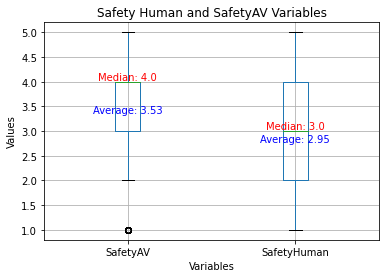

In [289]:
#Select columns for plot
plot_columns = ['SafetyAV','SafetyHuman']

#Create box plot
box_plot = bikepghpublic2017[plot_columns].boxplot()

#Highlight median values
medians = bikepghpublic2017[plot_columns].median()
for column, median in zip(plot_columns,medians):
    y = median 
    x = plot_columns.index(column) + 1
    box_plot.text(x,y, f'Median: {median}', ha='center', va='bottom', color='red')

averages = bikepghpublic2017[plot_columns].mean()
for column, average in zip(plot_columns, averages):
    y= average
    x = plot_columns.index(column) + 1
    box_plot.text(x, y, f'Average: {average:.2f}', ha='center', va='top', color='blue')

#Label plot
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Safety Human and SafetyAV Variables')

#Display plot
plt.show()

### SafetyAV is left skewed with outliers. SafetyHuman is fairly symmetrical with no outliers.

## Check Missing Values

In [290]:
# Count the number of missing values in each column
bikepghpublic2017.isnull().sum()

Response ID                 0
Start Date                  0
End Date                    0
Status                      0
Source Type                 0
InteractPedestrian         14
InteractBicycle            14
CircumstancesCoded        332
FeelingsProvingGround      14
SafetyHuman                14
SafetyAV                   14
AVSafetyPotential          14
RegulationTesting          14
RegulationSpeed            14
RegulationSchoolZone       14
RegulationShareData        14
AdvocacyIssues             19
BikePghPosition            14
PayingAttentionAV          14
FamiliarityTechnoology     14
ZipCode                    14
dtype: int64

## Handle Missing Values

In [291]:
#Treat missing values as a separate category
categorical_cols = ['PayingAttentionAV','FamiliarityTechnoology', 'InteractBicycle', 'InteractPedestrian', 
                    'FeelingsProvingGround', 'RegulationSpeed', 'RegulationSchoolZone', 'RegulationShareData',
                    'AdvocacyIssues', 'BikePghPosition', 'RegulationTesting', 'CircumstancesCoded', 'ZipCode', 'AVSafetyPotential']
#Fill in missing fields with text string "Missing"
bikepghpublic2017[categorical_cols] = bikepghpublic2017[categorical_cols].fillna("Missing")
#Display dataframe
bikepghpublic2017

,Response ID,Start Date,End Date,Status,Source Type,InteractPedestrian,InteractBicycle,CircumstancesCoded,FeelingsProvingGround,SafetyHuman,...,AVSafetyPotential,RegulationTesting,RegulationSpeed,RegulationSchoolZone,RegulationShareData,AdvocacyIssues,BikePghPosition,PayingAttentionAV,FamiliarityTechnoology,ZipCode
0,260279884,02/22/2017 10:38:27 AM PST,02/22/2017 10:46:22 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Approve,2.0,...,Yes,Yes,Not sure,Not sure,Yes,Disagree,Neither Support nor Oppose,To some extent,Mostly Unfamiliar,15203.0
1,260293425,02/22/2017 5:59:59 PM PST,02/22/2017 6:04:04 PM PST,COMPLETE,Survey Link,Yes,Yes,9.0,Disapprove,2.0,...,No,No,No,No,No,Neutral,Actively Oppose,To a moderate extent,Somewhat familiar,15201.0
2,260293589,02/22/2017 6:06:17 PM PST,02/22/2017 6:15:05 PM PST,COMPLETE,Survey Link,No,Yes,9.0,Disapprove,2.0,...,Not sure,Yes,Not sure,Yes,Not sure,Neutral,Neither Support nor Oppose,To little extent,Somewhat familiar,15222.0
3,260299834,02/22/2017 10:56:42 PM PST,02/22/2017 11:03:27 PM PST,COMPLETE,Survey Link,No,No,9.0,Neutral,2.0,...,Yes,Yes,Yes,No,Yes,Disagree,Neither Support nor Oppose,To a moderate extent,Somewhat familiar,15106.0
4,260335956,02/23/2017 11:20:08 AM PST,02/23/2017 11:22:05 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Somewhat Approve,4.0,...,Maybe,Yes,Yes,No,Not sure,Disagree,Actively Support,To little extent,Mostly Unfamiliar,15202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,261092370,03/08/2017 11:22:43 AM PST,03/08/2017 11:25:22 AM PST,COMPLETE,Survey Link,Not sure,Not sure,Missing,Somewhat Disapprove,5.0,...,Not sure,No,Yes,Yes,Not sure,Disagree,Neither Support nor Oppose,To some extent,Mostly Unfamiliar,15217.0
809,261096132,03/08/2017 1:26:00 PM PST,03/08/2017 1:33:54 PM PST,COMPLETE,Social,Not sure,Not sure,Missing,Neutral,3.0,...,Yes,Yes,No,No,Not sure,Neutral,Neither Support nor Oppose,To little extent,Somewhat familiar,15216.0
810,261100647,03/08/2017 4:03:38 PM PST,03/08/2017 4:07:09 PM PST,COMPLETE,Social,No,Yes,Missing,Somewhat Approve,3.0,...,Yes,Not sure,No,No,Not sure,Disagree,Neither Support nor Oppose,To some extent,Somewhat familiar,15222.0
811,261106419,03/08/2017 8:17:34 PM PST,03/08/2017 8:20:12 PM PST,COMPLETE,Social,No,Yes,Missing,Disapprove,4.0,...,Maybe,Yes,Yes,Not sure,Yes,Neutral,No Opinion,To a moderate extent,Somewhat familiar,15206.0


In [292]:
numeric_columns = ['SafetyHuman', 'SafetyAV']
for column in numeric_columns:
    mean_value = bikepghpublic2017[column].mean()
    bikepghpublic2017[column].fillna(mean_value, inplace=True)

# Check if missing values are filled
print(bikepghpublic2017.isnull().sum())

Response ID               0
Start Date                0
End Date                  0
Status                    0
Source Type               0
InteractPedestrian        0
InteractBicycle           0
CircumstancesCoded        0
FeelingsProvingGround     0
SafetyHuman               0
SafetyAV                  0
AVSafetyPotential         0
RegulationTesting         0
RegulationSpeed           0
RegulationSchoolZone      0
RegulationShareData       0
AdvocacyIssues            0
BikePghPosition           0
PayingAttentionAV         0
FamiliarityTechnoology    0
ZipCode                   0
dtype: int64


## Check for duplicate fields

In [293]:
if bikepghpublic2017.duplicated().any():
    print('There are duplicates in the bikepghpublic2017 data')
else:
    print('There are NO duplicates in the bikepublic2017 data')

There are NO duplicates in the bikepublic2017 data


## Data Visualizations

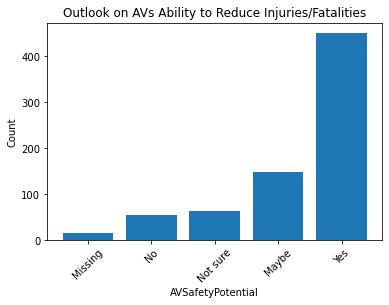

In [294]:
# Display histogram of AVSafetyPotential lvariable
# Shows outlook on whether AVs have the potential to reduce injuries and fatalities
news_counts = bikepghpublic2017['AVSafetyPotential'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('AVSafetyPotential')
plt.ylabel('Count')
plt.title('Outlook on AVs Ability to Reduce Injuries/Fatalities')
plt.show()

In [295]:
#Displays count of each response under AVSafetyPotential
bikepghpublic2017.groupby('AVSafetyPotential')['AVSafetyPotential'].size()

AVSafetyPotential
Maybe       148
Missing      14
No           55
Not sure     62
Yes         450
Name: AVSafetyPotential, dtype: int64

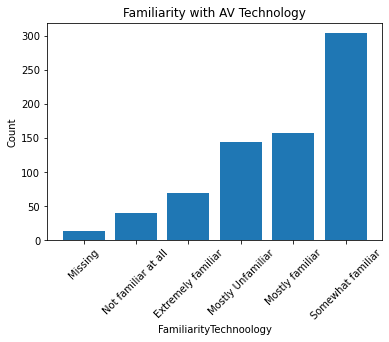

In [296]:
# Display histogram of FamiliarityTechnoology variable
# Surveyed people share to what extent they're familiar with AV technology
tech_counts = bikepghpublic2017['FamiliarityTechnoology'].value_counts()
tech_sorted_counts = tech_counts.sort_values(ascending=True)
plt.bar(tech_sorted_counts.index, tech_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('FamiliarityTechnoology')
plt.ylabel('Count')
plt.title('Familiarity with AV Technology')
plt.show()

In [297]:
#Displays count of each response under FamiliarityTechnoology
bikepghpublic2017.groupby('FamiliarityTechnoology')['FamiliarityTechnoology'].size()

FamiliarityTechnoology
Extremely familiar      70
Missing                 14
Mostly Unfamiliar      144
Mostly familiar        157
Not familiar at all     40
Somewhat familiar      304
Name: FamiliarityTechnoology, dtype: int64

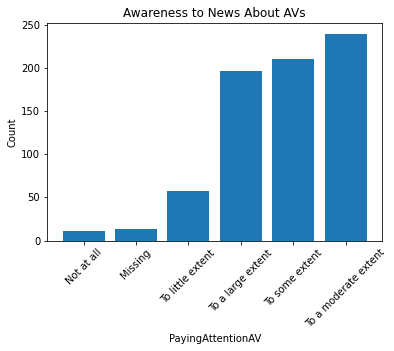

In [298]:
# Display histogram of PayingAttentionAV variable
# Shows to what extent the people surveyed pay attention to news about AVs
news_counts = bikepghpublic2017['PayingAttentionAV'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('PayingAttentionAV')
plt.ylabel('Count')
plt.title('Awareness to News About AVs')
plt.show()

In [299]:
#Displays count of each response under PayingAttentionAV
bikepghpublic2017.groupby('PayingAttentionAV')['PayingAttentionAV'].size()

PayingAttentionAV
Missing                  14
Not at all               11
To a large extent       196
To a moderate extent    240
To little extent         58
To some extent          210
Name: PayingAttentionAV, dtype: int64

## Correlation Analysis

In [300]:
bikepghpublic2017['SafetyHuman'] = bikepghpublic2017['SafetyHuman'].astype('category')
bikepghpublic2017['SafetyAV'] = bikepghpublic2017['SafetyAV'].astype('category')

#Select columns for correlation
correlation_cols = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'AVSafetyPotential', 'PayingAttentionAV', 'FamiliarityTechnoology']
df = bikepghpublic2017[correlation_cols]

#Remove entries with missing values
df.dropna(inplace=True)

#categories = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'PayingAttentionAV', 'FamiliarityTechnoology']

for var in correlation_cols:
    contingency_table = pd.crosstab(df['AVSafetyPotential'], df[var])
    chi2, p_value, _, _= stats.chi2_contingency(contingency_table)
    print(f'Chi-Square Test of Independence between AvSafetyPotential and {var}:')
    print(f'Chi-square statistic: {chi2}')
    print(f'p-value: {p_value}')

Chi-Square Test of Independence between AvSafetyPotential and InteractPedestrian:
Chi-square statistic: 746.9116039491587
p-value: 3.963315817250607e-152
Chi-Square Test of Independence between AvSafetyPotential and InteractBicycle:
Chi-square statistic: 743.6187004560982
p-value: 2.0115694215670432e-151
Chi-Square Test of Independence between AvSafetyPotential and SafetyHuman:
Chi-square statistic: 743.4829955860398
p-value: 1.3732178682730587e-144
Chi-Square Test of Independence between AvSafetyPotential and SafetyAV:
Chi-square statistic: 1074.153082609973
p-value: 5.868264973714982e-215
Chi-Square Test of Independence between AvSafetyPotential and AVSafetyPotential:
Chi-square statistic: 2915.9999999999995
p-value: 0.0
Chi-Square Test of Independence between AvSafetyPotential and PayingAttentionAV:
Chi-square statistic: 804.5547596590504
p-value: 1.527294304575926e-157
Chi-Square Test of Independence between AvSafetyPotential and FamiliarityTechnoology:
Chi-square statistic: 824.60

/var/folders/1b/bd7sck5n6f1_0f3x8m3kfr040000gn/T/ipykernel_60653/1614959556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


## Process Categorical Data

In [301]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


X_categorical = bikepghpublic2017.loc[:, ['PayingAttentionAV','FamiliarityTechnoology', 'InteractBicycle', 'InteractPedestrian', 
                                          'FeelingsProvingGround', 'RegulationSpeed', 'RegulationSchoolZone', 'RegulationShareData',
                                          'AdvocacyIssues', 'BikePghPosition', 'RegulationTesting']].values

#OneHotEncoding
ohe = OneHotEncoder()
categorical_data = ohe.fit_transform(X_categorical).toarray()
categorical_df = pd.DataFrame(categorical_data)
categorical_df.columns = ohe.get_feature_names_out()
categorical_df.head()

,x0_Missing,x0_Not at all,x0_To a large extent,x0_To a moderate extent,x0_To little extent,x0_To some extent,x1_Extremely familiar,x1_Missing,x1_Mostly Unfamiliar,x1_Mostly familiar,...,x8_Strongly Disagree,x9_Actively Oppose,x9_Actively Support,x9_Missing,x9_Neither Support nor Oppose,x9_No Opinion,x10_Missing,x10_No,x10_Not sure,x10_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [302]:
X_numeric_data = bikepghpublic2017.loc[:, ['SafetyHuman','SafetyAV']].values
numeric_df = pd.DataFrame(X_numeric_data)
numeric_df.columns = ['SafeAv','SafeHuman']

X = pd.concat([categorical_df,numeric_df], axis = 1)

X.head()

,x0_Missing,x0_Not at all,x0_To a large extent,x0_To a moderate extent,x0_To little extent,x0_To some extent,x1_Extremely familiar,x1_Missing,x1_Mostly Unfamiliar,x1_Mostly familiar,...,x9_Actively Support,x9_Missing,x9_Neither Support nor Oppose,x9_No Opinion,x10_Missing,x10_No,x10_Not sure,x10_Yes,SafeAv,SafeHuman
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0


In [303]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   x0_Missing                     729 non-null    float64
 1   x0_Not at all                  729 non-null    float64
 2   x0_To a large extent           729 non-null    float64
 3   x0_To a moderate extent        729 non-null    float64
 4   x0_To little extent            729 non-null    float64
 5   x0_To some extent              729 non-null    float64
 6   x1_Extremely familiar          729 non-null    float64
 7   x1_Missing                     729 non-null    float64
 8   x1_Mostly Unfamiliar           729 non-null    float64
 9   x1_Mostly familiar             729 non-null    float64
 10  x1_Not familiar at all         729 non-null    float64
 11  x1_Somewhat familiar           729 non-null    float64
 12  x2_Missing                     729 non-null    flo

In [304]:
file_path = "/Users/mattmcmon/Documents/Code/AutoVehicles/Data/For_Modeling/2017PublicSurveyFeatures.csv"
X.to_csv(file_path, index=False)